In [1]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [2]:
#1_trial is a name of a folder containing the cali files, you may create a folder with a different name and replace the folder name here
tk = th.Thicket.from_caliperreader(glob("./*.cali"))
# tk = th.Thicket.from_caliperreader(glob("p32-a16-trandom.cali"))
# tk = th.Thicket.from_caliperreader(glob("p2-a16-irandom.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:09<00:00, 28.64it/s]


In [3]:
print(tk.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

9.478 main
└─ 9.446 main
   ├─ 8.979 MPI_Comm_dup
   ├─ 0.000 MPI_Finalize
   ├─ 0.000 MPI_Finalized
   ├─ 0.000 MPI_Initialized
   ├─ 0.390 comm
   │  ├─ 0.164 comm_large
   │  │  ├─ 0.023 MPI_Gather
   │  │  └─ 0.140 MPI_Scatter
   │  └─ 0.227 comm_small
   │     └─ 0.226 MPI_Barrier
   ├─ 0.021 comp
   │  ├─ 0.021 comp_large
   │  └─ 0.000 comp_small
   ├─ 0.054 correctness_check
   │  ├─ 0.047 MPI_Bcast
   │  └─ 0.007 MPI_Gather
   └─ 0.000 data_init_runtime

Legend (Metric: Avg time/rank Min: 0.00 Max: 9.48 indices: {'profile': 365892})
█ 8.53 - 9.48
█ 6.63 - 8.53
█ 4.74 - 6.63
█ 2.84 - 4.74
█ 0.95 - 2.84
█ 0.00 - 0.95

name User code    ◀  Only in left graph    ▶  Only in right graph



In [4]:
print("Metadata columns available:")
print(tk.metadata.columns)



Metadata columns available:
Index(['cali.caliper.version', 'mpi.world.size', 'spot.metrics',
       'spot.timeseries.metrics', 'spot.format.version', 'spot.options',
       'spot.channels', 'cali.channel', 'spot:node.order', 'spot:output',
       'spot:profile.mpi', 'spot:region.count', 'spot:time.exclusive',
       'spot:time.variance', 'launchdate', 'libraries', 'cmdline', 'cluster',
       'algorithm', 'programming_model', 'data_type', 'size_of_data_type',
       'input_size', 'input_type', 'num_procs', 'scalability', 'group_num',
       'implementation_source'],
      dtype='object')


In [5]:
tk.metadata_column_to_perfdata("num_procs")
tk.metadata_column_to_perfdata("input_size")
tk.metadata_column_to_perfdata("input_type")

tk.dataframe = tk.dataframe.reset_index().set_index(["node", "num_procs", "input_size", "input_type"]).sort_index()

tk.dataframe.head()

profile  \
node                                 num_procs input_size input_type               
{'name': 'main', 'type': 'function'} 2         65536      perturbed   2509677608   
                                                          random      1167935175   
                                                          reverse     2971141521   
                                                          sorted       341041649   
                                               262144     perturbed   1884201177   

                                                                      nid  \
node                                 num_procs input_size input_type        
{'name': 'main', 'type': 'function'} 2         65536      perturbed   1.0   
                                                          random      1.0   
                                                          reverse     1.0   
                                                          sorted      1.0   
                                               262144     perturbed   1.0   

                                                                       spot.channel  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 2         65536      perturbed   regionprofile   
                                                          random      regionprofile   
                                                          reverse     regionprofile   
                                                          sorted      regionprofile   
                                               262144     perturbed   regionprofile   

                                                                      Min time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 2         65536      perturbed        0.033021   
                                                          random           0.038296   
                                                          reverse          0.037928   
                                                          sorted           0.028038   
                                               262144     perturbed        0.099451   

                                                                      Max time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 2         65536      perturbed        0.035090   
                                                          random           0.038379   
                                                          reverse          0.037947   
                                                          sorted           0.030156   
                                               262144     perturbed        0.099509   

                                                                      Avg time/rank  \
node                                 num_procs input_size input_type                  
{'name': 'main', 'type': 'function'} 2         65536      perturbed        0.034056   
                                                          random           0.038337   
                                                          reverse          0.037937   
                                                          sorted           0.029097   
                                               262144     perturbed        0.099480   

                                                                      Total time  \
node                                 num_procs input_size input_type               
{'name': 'main', 'type': 'function'} 2         65536      perturbed     0.068111   
                                                          random        0.076674   
                                                          reverse       0.075875   
                                                          sorted        0.058194   


In [6]:
# Define common variables
num_procs = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
input_sizes = [65536, 262144, 1048576, 4194304, 16777216, 67108864, 268435456]

# Change font size for all plots
plt.rcParams.update({"font.size": 20})

In [7]:
def plot_pandas(df, title, xlabel, ylabel):
    plot = df.plot(kind="line", 
        marker='o', 
        title=title, 
        xlabel=xlabel,
        ylabel=ylabel, 
        figsize=(15,7)
    )
    return plot

In [8]:
# # List of the node names you're interested in
# desired_nodes = ["main", "data_init_runtime", "comp", "comm", "correctness_check"]

# # Traverse through the graph and only process the nodes of interest
# for node in tk.graph.traverse():
#     # Check if the node's name is in the desired nodes list
#     if node.frame['name'] in desired_nodes:
#         # Filter the dataframe for the current node
#         node_df = tk.dataframe.xs(node, level='node')

#         # Loop through unique input types and input sizes for this node
#         for input_type in node_df.index.get_level_values('input_type').unique():
#             for input_size in node_df.index.get_level_values('input_size').unique():
#                 # Filter for this specific input_type and input_size combination
#                 subset_df = node_df.xs((input_size, input_type), level=('input_size', 'input_type'))

#                 # Check if we have more than one level in the index (i.e., MultiIndex)
#                 if isinstance(subset_df.index, pd.MultiIndex):
#                     # Unstack the DataFrames for Avg, Min, and Max time
#                     avg_time = subset_df["Avg time/rank"].unstack(level="num_procs")
#                     min_time = subset_df["Min time/rank"].unstack(level="num_procs")
#                     max_time = subset_df["Max time/rank"].unstack(level="num_procs")

#                     # Plot as before
#                     for col in avg_time.columns:
#                         avg_col_data = avg_time[col]
#                         min_col_data = min_time[col]
#                         max_col_data = max_time[col]

#                         # Combine the columns
#                         df_combined = pd.concat([avg_col_data, min_col_data, max_col_data], axis=1)
#                         df_combined.columns = ['Avg time/rank', 'Min time/rank', 'Max time/rank']

#                         # Plot
#                         plot_pandas(
#                             df=df_combined,
#                             title=f"Array length: {input_size}, Array type: {input_type}, {node.frame['name']}",
#                             xlabel="# of Processors",
#                             ylabel="Time (seconds)",
#                         )
#                 else:
#                     # When it's not a MultiIndex, handle it directly without unstacking
#                     avg_time = subset_df["Avg time/rank"]
#                     min_time = subset_df["Min time/rank"]
#                     max_time = subset_df["Max time/rank"]

#                     # Combine into a single DataFrame with columns for Avg, Min, and Max time/rank
#                     df_combined = pd.concat([avg_time, min_time, max_time], axis=1)
#                     df_combined.columns = ['Avg time/rank', 'Min time/rank', 'Max time/rank']

#                     # Plot
#                     plot_pandas(
#                         df=df_combined,
#                         title=f"Array length: {input_size}, Array type: {input_type}, {node.frame['name']}",
#                         xlabel="# of Processors",
#                         ylabel="Time (seconds)",
#                     )

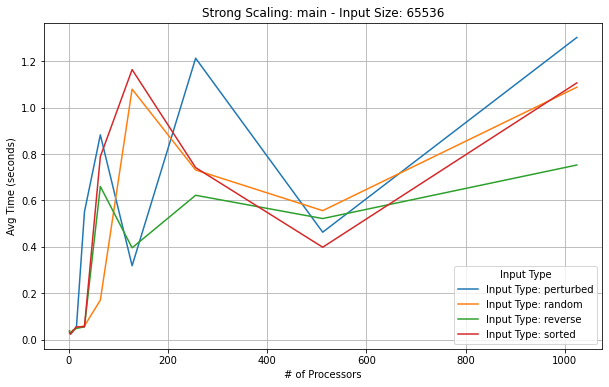

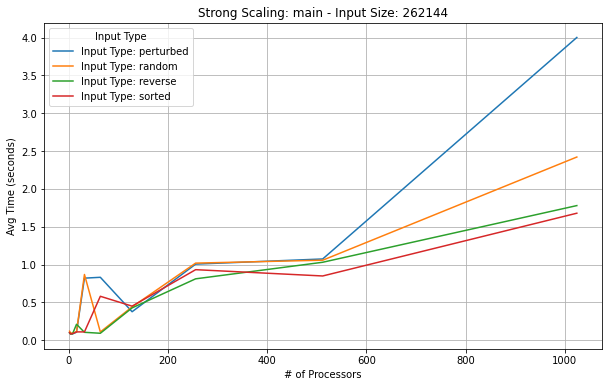

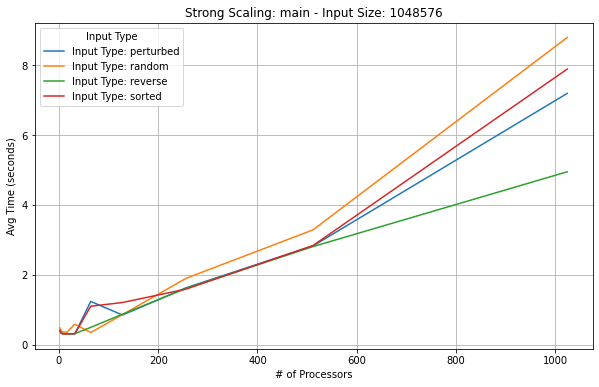

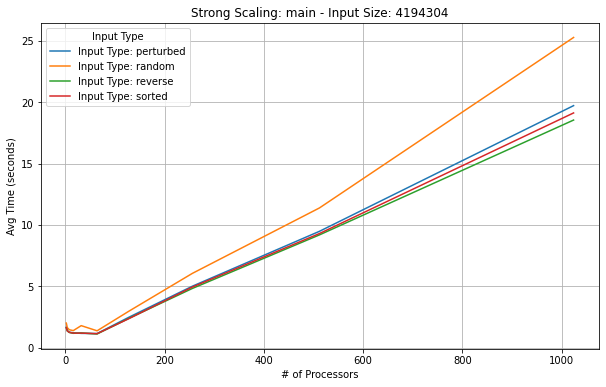

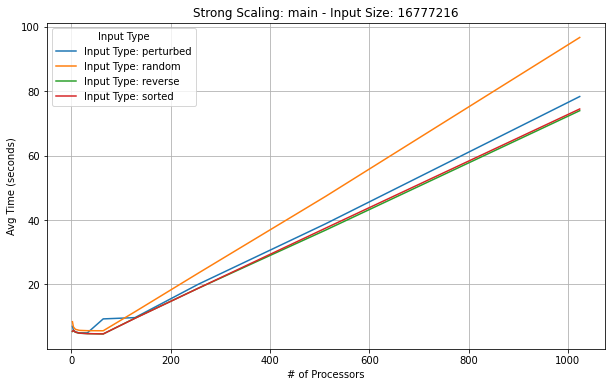

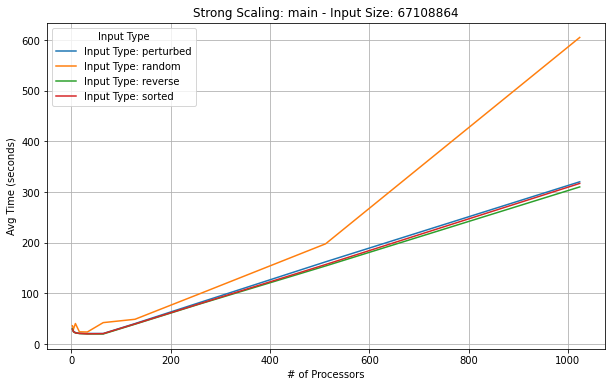

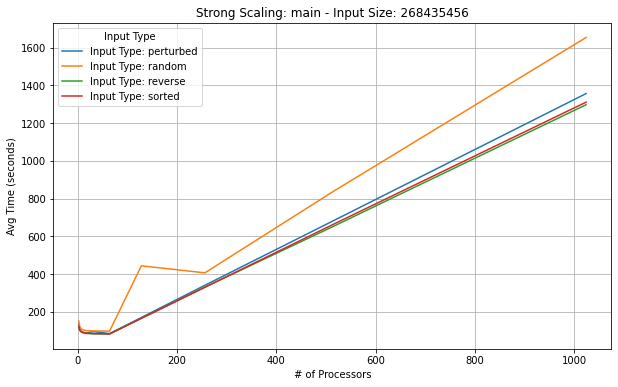

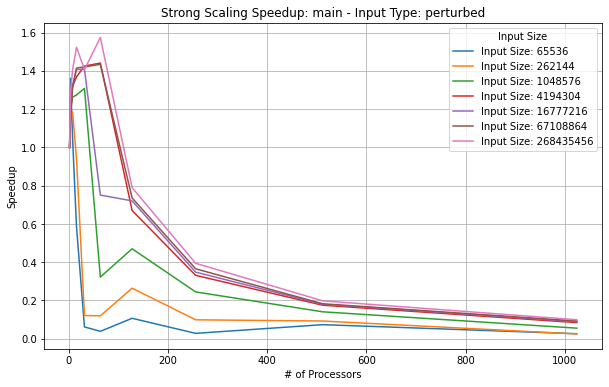

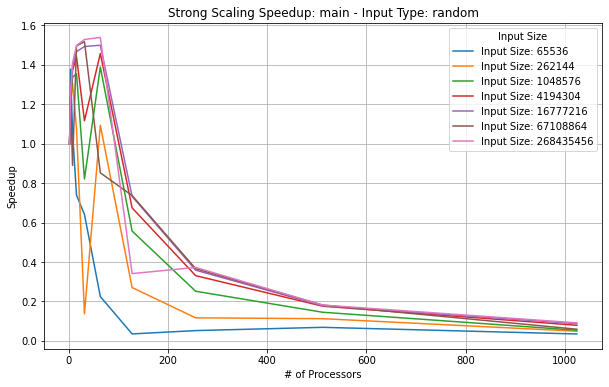

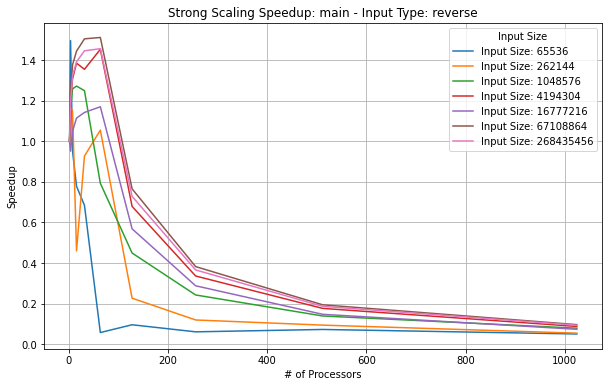

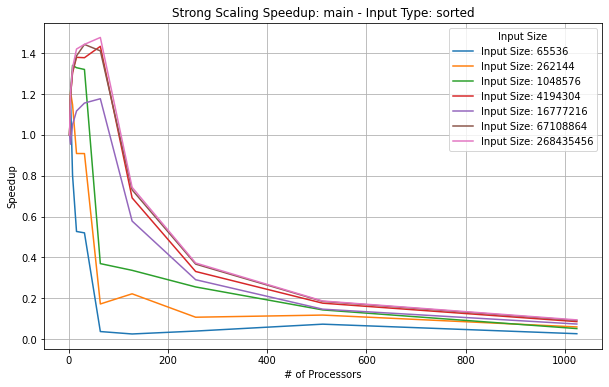

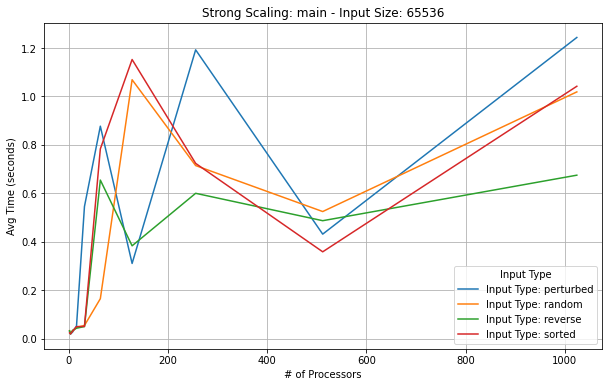

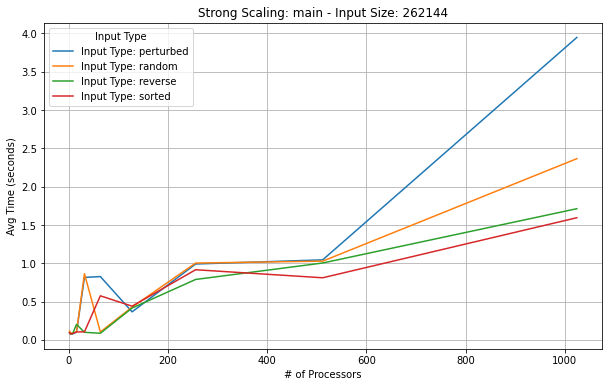

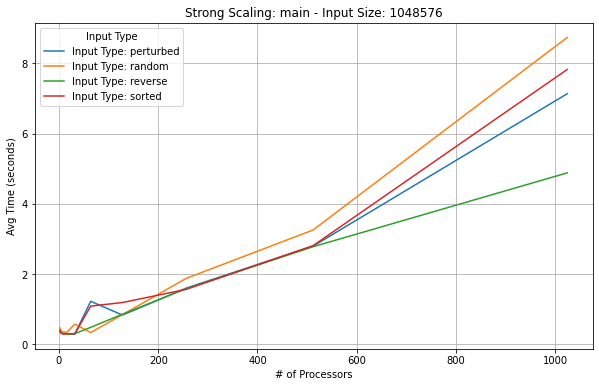

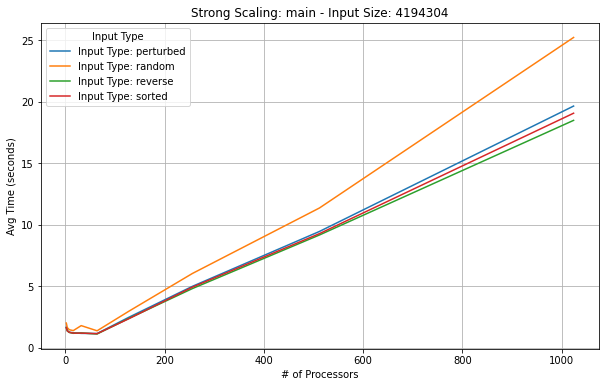

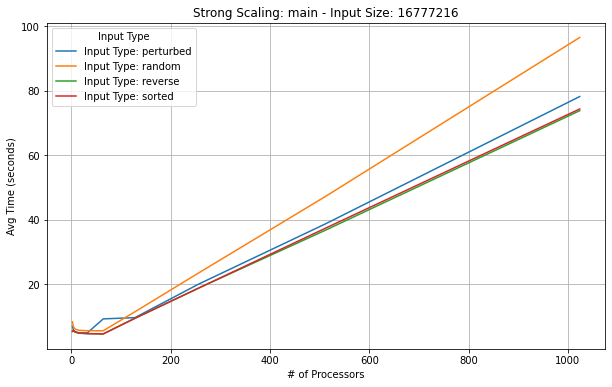

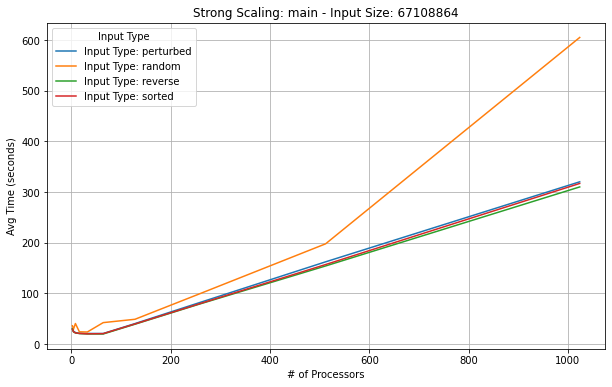

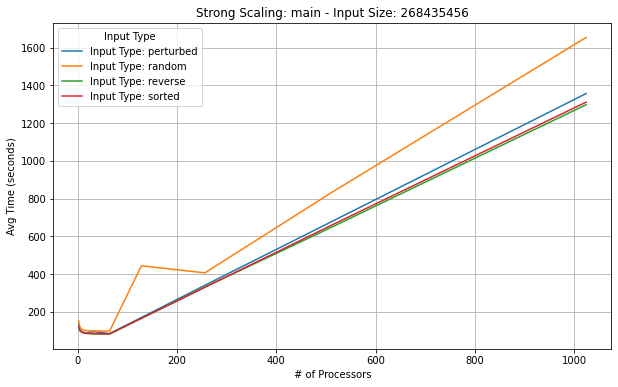

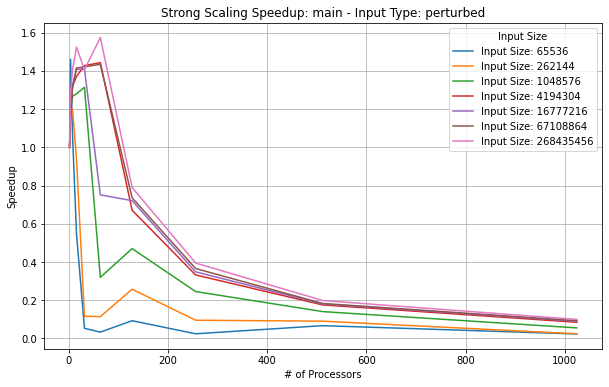

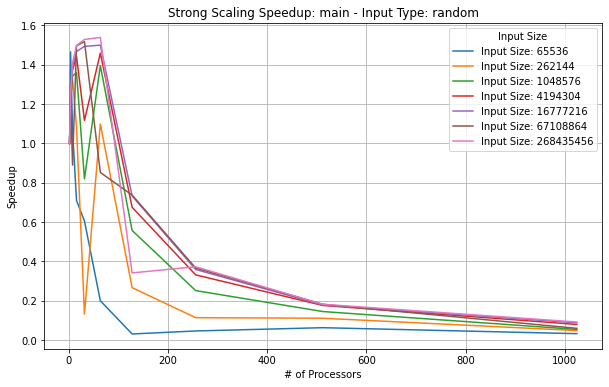

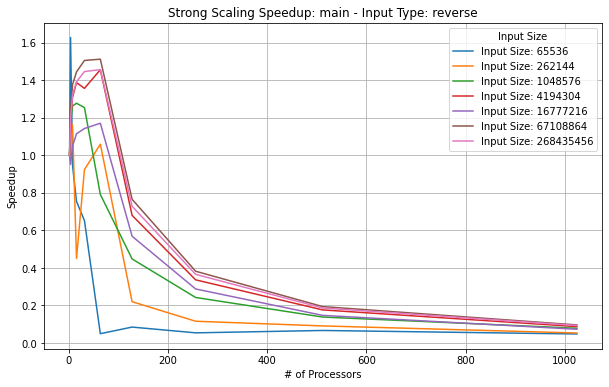

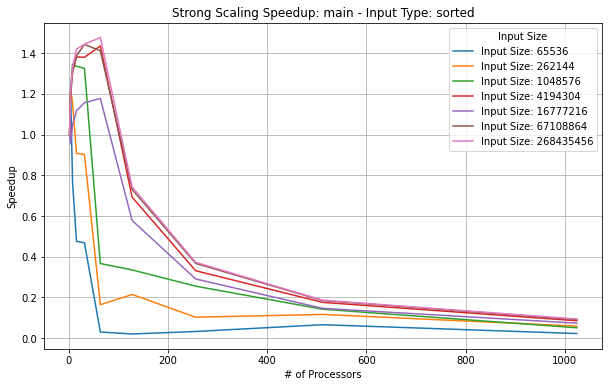

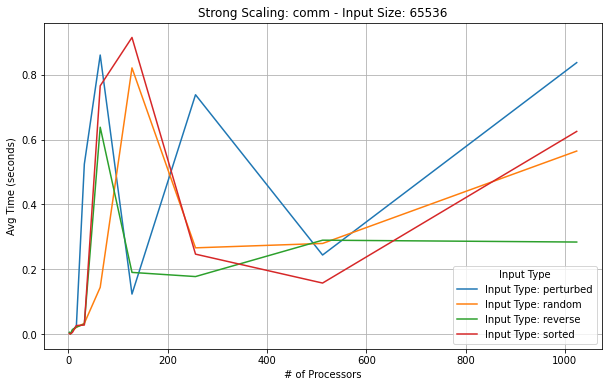

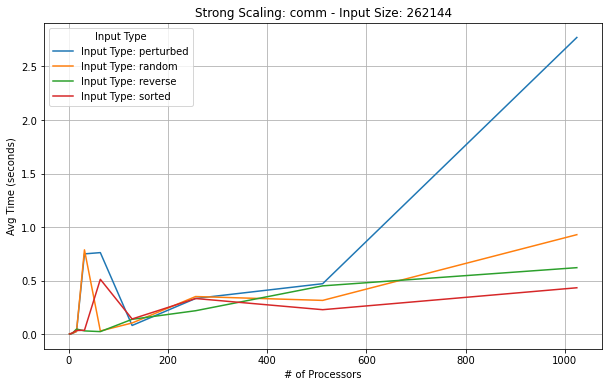

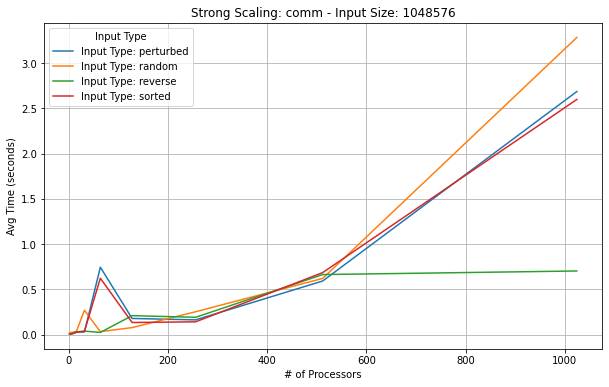

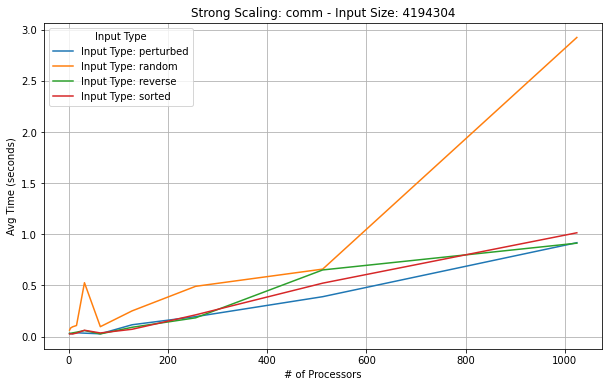

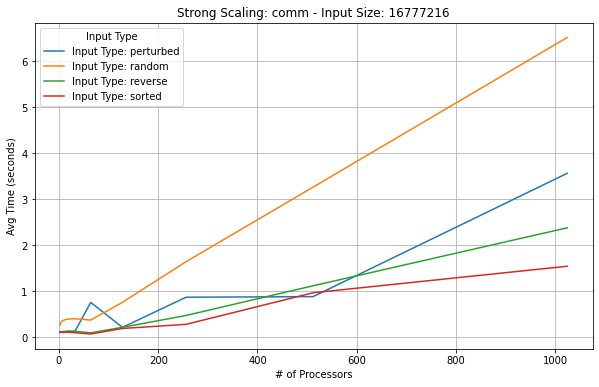

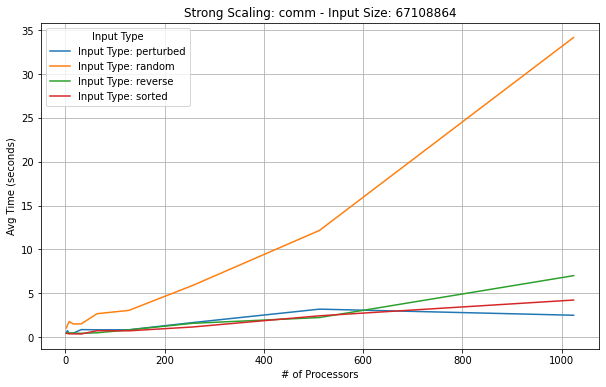

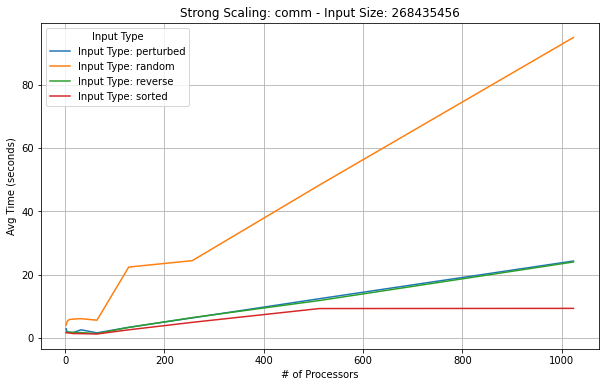

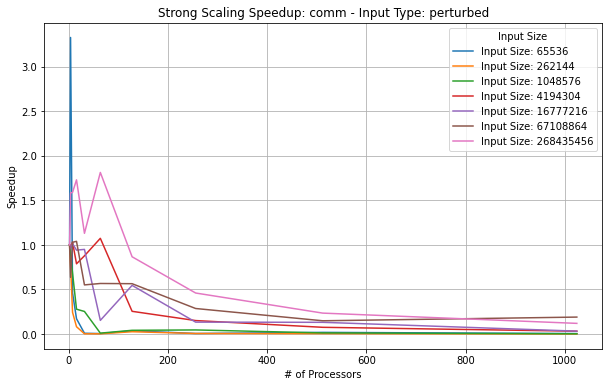

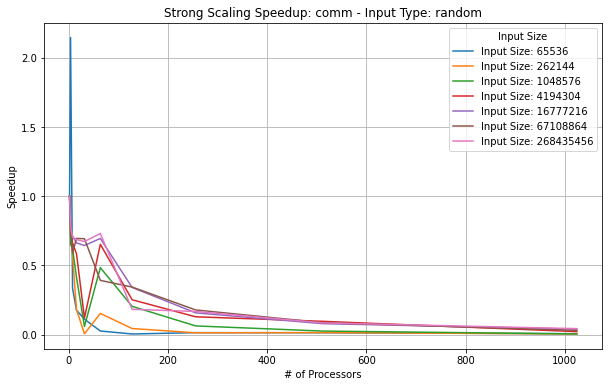

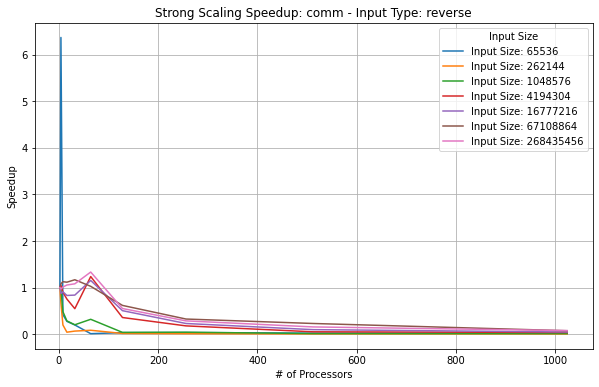

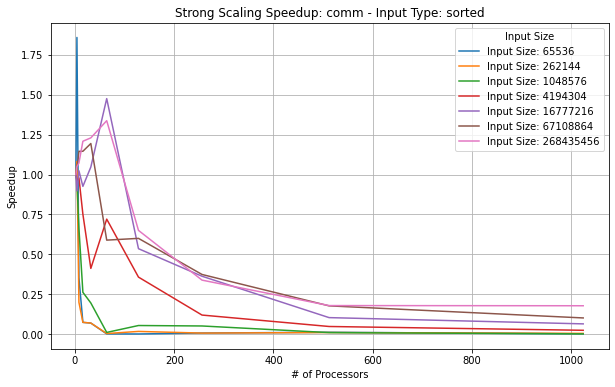

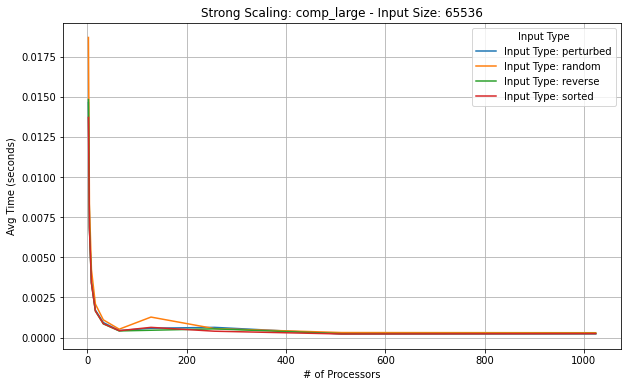

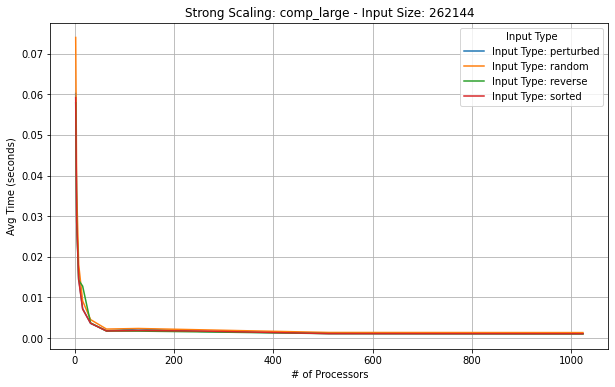

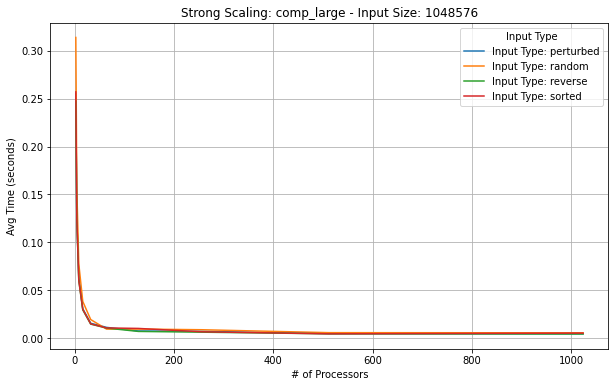

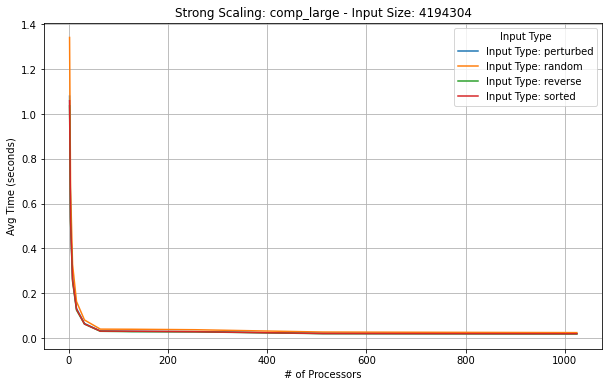

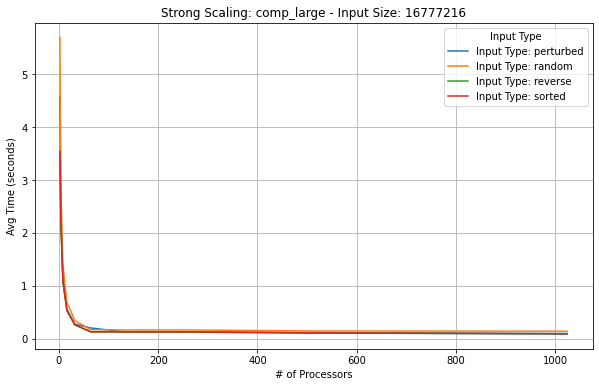

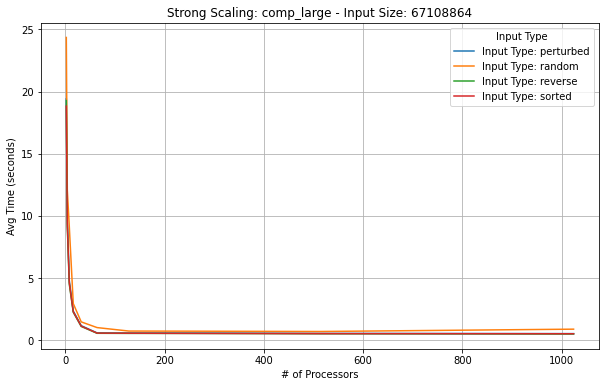

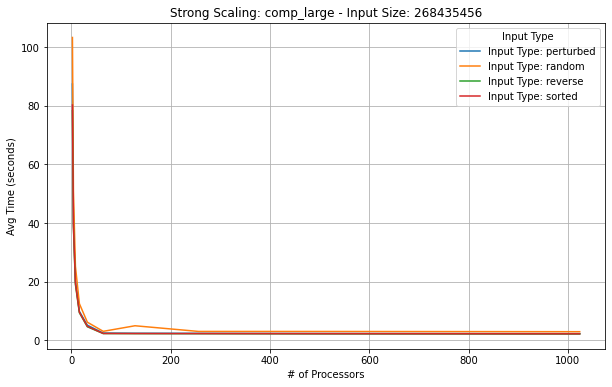

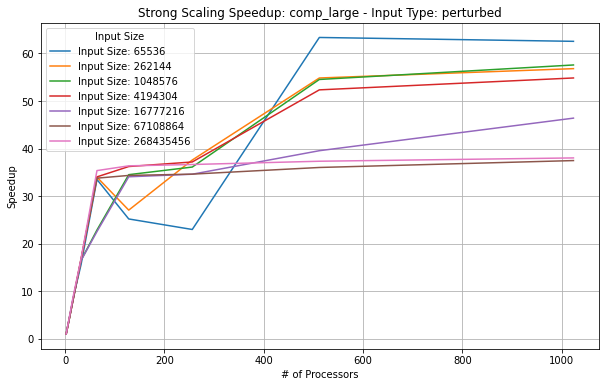

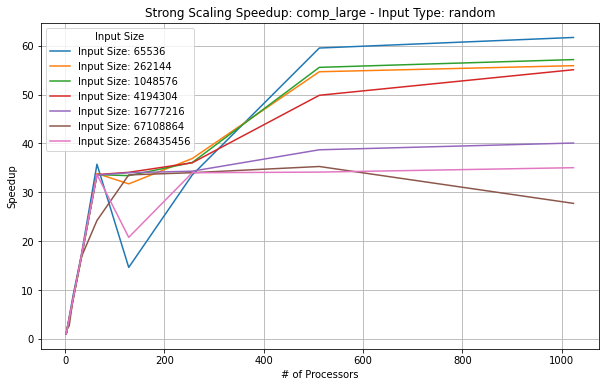

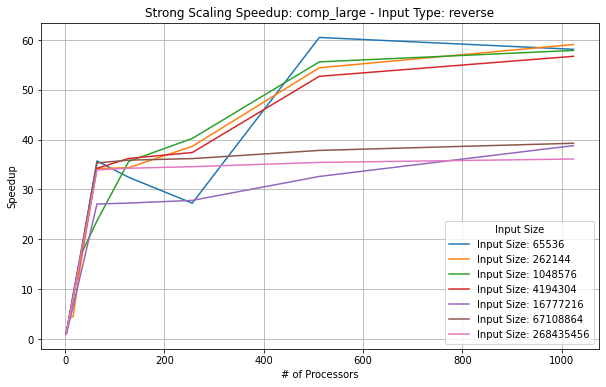

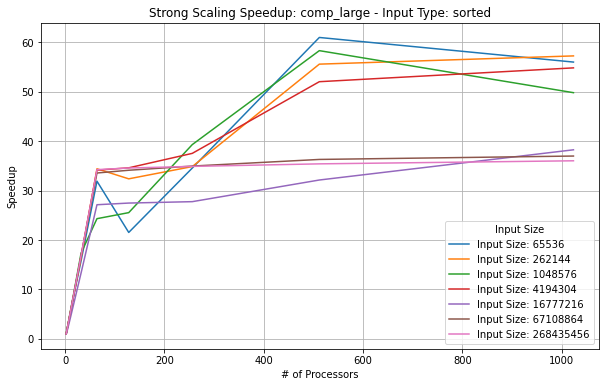

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt

# List of nodes you're interested in
desired_nodes = ["comm", "comp_large", "main"]

# Traverse through the graph and process the nodes of interest
for node in tk.graph.traverse():
    if node.frame['name'] in desired_nodes:
        # Filter the dataframe for the current node
        node_df = tk.dataframe.xs(node, level='node')

        # Part 1: Strong scaling plots for each input_size with lines for input_type
        for input_size in node_df.index.get_level_values('input_size').unique():
            plt.figure(figsize=(10, 6))  # Create a new figure for each plot
            for input_type in node_df.index.get_level_values('input_type').unique():
                # Filter for this input_size and input_type
                subset_df = node_df.xs((input_size, input_type), level=('input_size', 'input_type'))

                # Check if it's a MultiIndex
                if isinstance(subset_df.index, pd.MultiIndex):
                    avg_time = subset_df["Avg time/rank"].unstack(level="num_procs")
                else:
                    avg_time = subset_df["Avg time/rank"]

                # Plot avg_time against number of processors
                plt.plot(avg_time.index, avg_time.values, label=f"Input Type: {input_type}")

            # Customize the plot
            plt.title(f"Strong Scaling: {node.frame['name']} - Input Size: {input_size}")
            plt.xlabel("# of Processors")
            plt.ylabel("Avg Time (seconds)")
            plt.legend(title="Input Type")
            plt.grid(True)
            plt.show()  # Display the plot

        # Part 2: Speedup plots for each input_type
        for input_type in node_df.index.get_level_values('input_type').unique():
            plt.figure(figsize=(10, 6))  # New figure for speedup plot
            for input_size in node_df.index.get_level_values('input_size').unique():
                # Filter for this input_type and input_size
                subset_df = node_df.xs((input_size, input_type), level=('input_size', 'input_type'))

                # Check if it's a MultiIndex
                if isinstance(subset_df.index, pd.MultiIndex):
                    avg_time = subset_df["Avg time/rank"].unstack(level="num_procs")
                else:
                    avg_time = subset_df["Avg time/rank"]

                # Calculate speedup (Speedup = time with 1 processor / time with n processors)
                speedup = avg_time.iloc[0] / avg_time

                # Plot speedup against number of processors
                plt.plot(speedup.index, speedup.values, label=f"Input Size: {input_size}")

            # Customize the plot
            plt.title(f"Strong Scaling Speedup: {node.frame['name']} - Input Type: {input_type}")
            plt.xlabel("# of Processors")
            plt.ylabel("Speedup")
            plt.legend(title="Input Size")
            plt.grid(True)
            plt.show()  # Display the plot

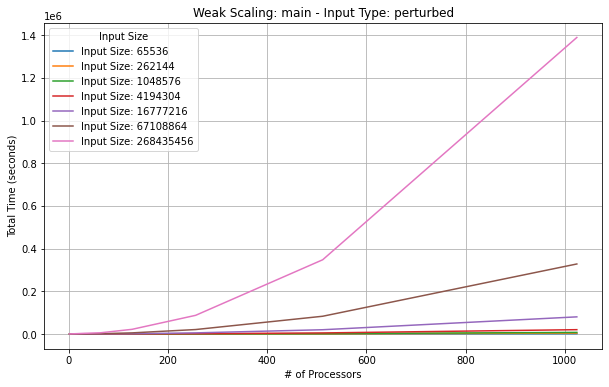

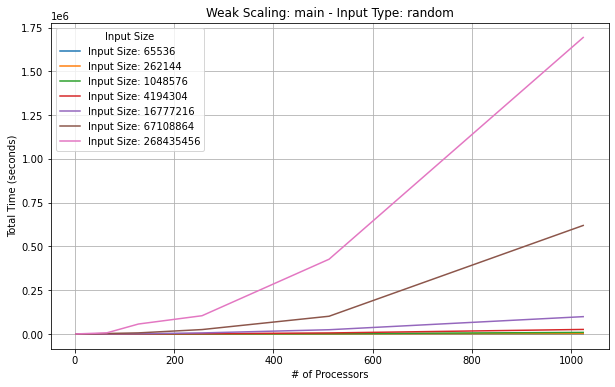

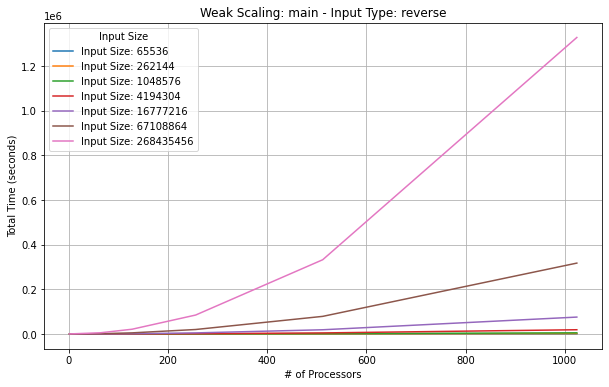

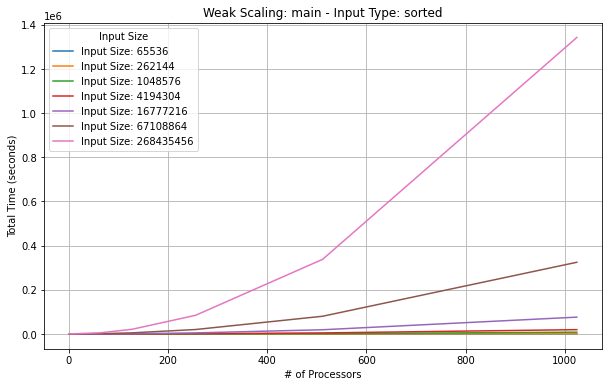

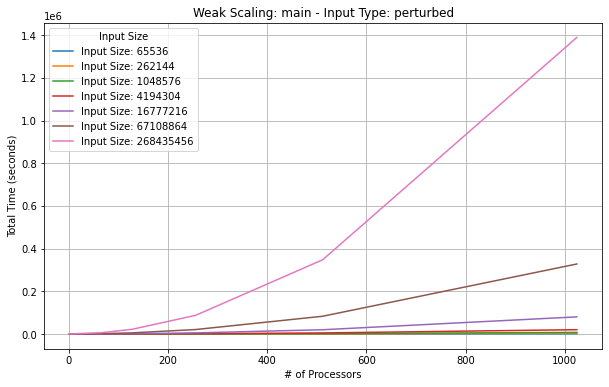

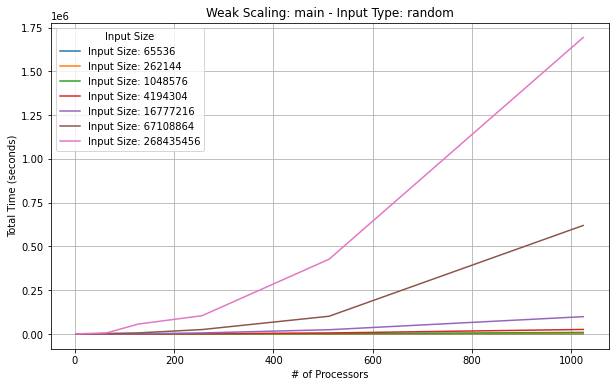

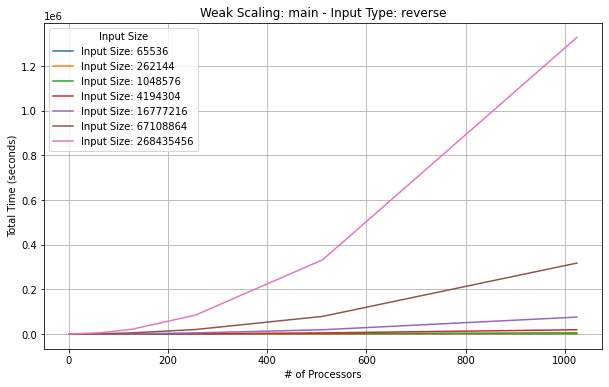

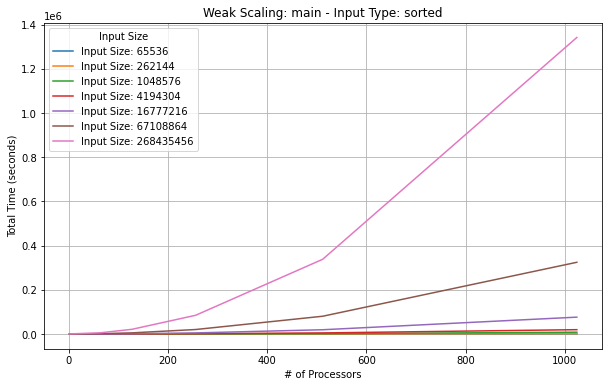

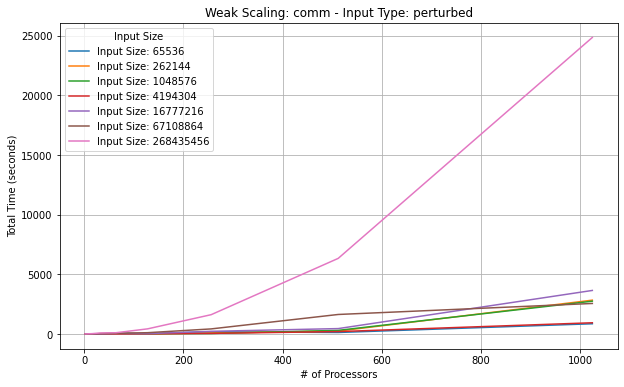

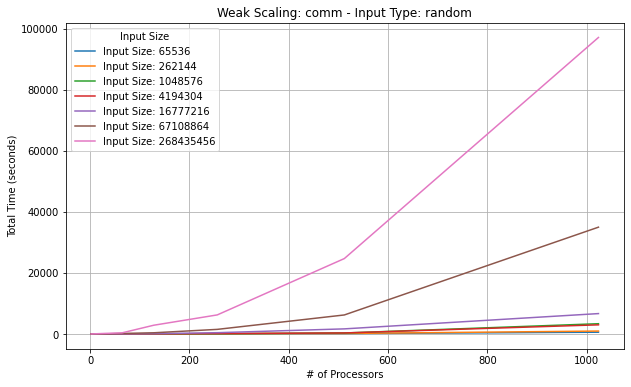

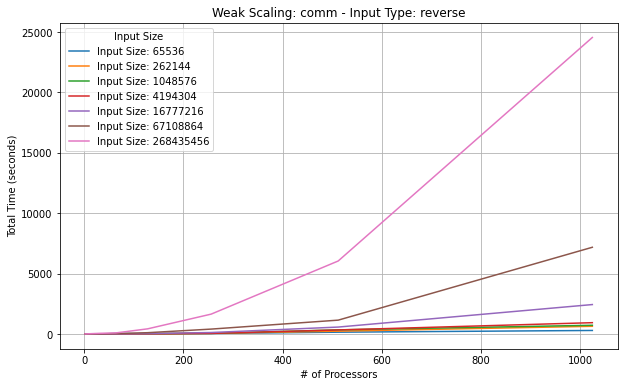

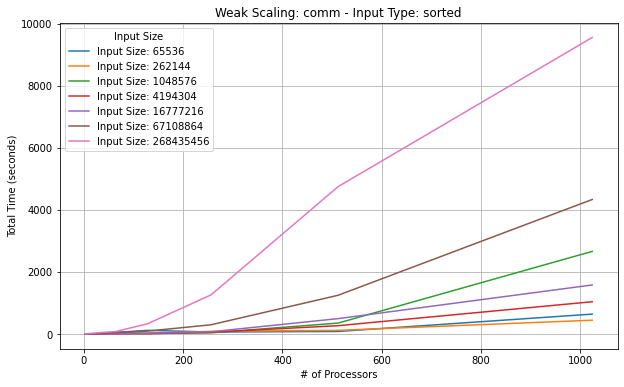

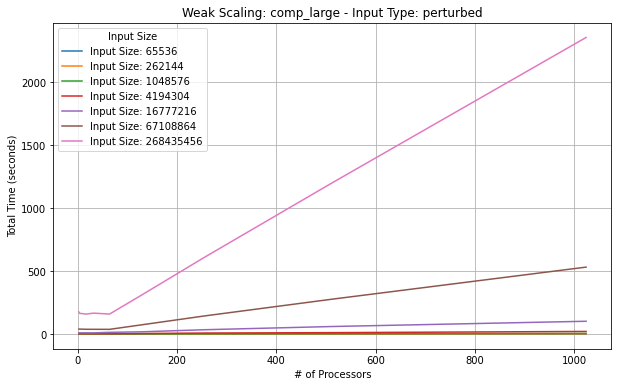

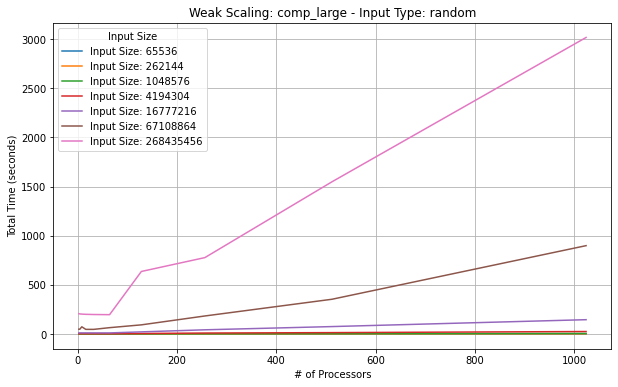

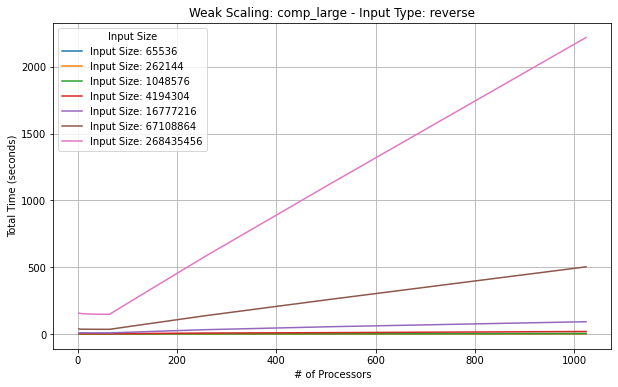

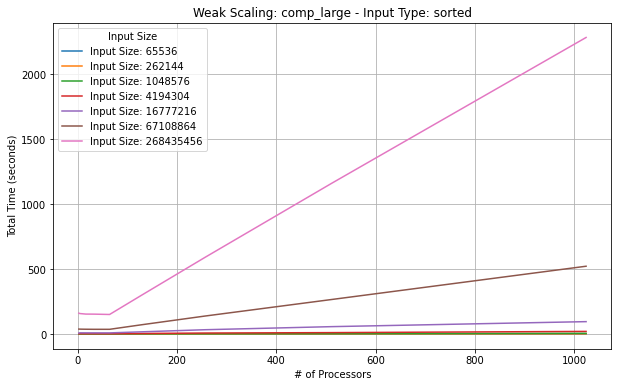

In [11]:
# Import necessary libraries
import matplotlib.pyplot as plt

# List of the node names you're interested in
desired_nodes = ["comm", "comp_large", "main"]

# Traverse through the graph and only process the nodes of interest
for node in tk.graph.traverse():
    if node.frame['name'] in desired_nodes:
        # Filter the dataframe for the current node
        node_df = tk.dataframe.xs(node, level='node')

        # Part 3: Weak scaling plots for each input_type
        for input_type in node_df.index.get_level_values('input_type').unique():
            plt.figure(figsize=(10, 6))  # Create a new figure for each plot
            for input_size in node_df.index.get_level_values('input_size').unique():
                # Filter for this input_type and input_size combination
                subset_df = node_df.xs((input_size, input_type), level=('input_size', 'input_type'))

                # Check if it's a MultiIndex
                if isinstance(subset_df.index, pd.MultiIndex):
                    total_time = subset_df["Total time"].unstack(level="num_procs")
                else:
                    total_time = subset_df["Total time"]

                # Plot total_time against number of processors
                plt.plot(total_time.index, total_time.values, label=f"Input Size: {input_size}")

            # Customize the plot for weak scaling
            plt.title(f"Weak Scaling: {node.frame['name']} - Input Type: {input_type}")
            plt.xlabel("# of Processors")
            plt.ylabel("Total Time (seconds)")  # Label Y-axis as total time
            plt.legend(title="Input Size")
            plt.grid(True)
            plt.show()  # Display the plot